# Preparing images and labels


## Base on the CNN-New (All 15 classes, 2 )

## Steps in this notbook:
### 1. Count the labels from the cleaned.csv file 
### 2. Include all classes 
### 3. Match the labels and the images  into new array
### 4. Convert classes into integers 
### 5. Convert images into 3d array 
### 6. Convert 3d array into 2d for SMOTE
### 7. Apply SMOTE
### 8. Convert 2d array back to 4d for CNN
### 9. Run CNN
### 10. Model Prediction

In [1]:
import glob
import random
import cv2
import pandas as pd 
import numpy as np

# import images
images = []
for filename in glob.iglob('images/**/*.png', recursive=True):
    images.append(filename)
# labels 
df = pd.read_csv('cleaned.csv')

In [2]:
# number of label
df.shape #(91324, 13)

(91324, 13)

In [3]:
# count labels 
df['Finding Labels'].value_counts()

No Finding            60361
Infiltration           9547
Atelectasis            4215
Effusion               3955
Nodule                 2705
Pneumothorax           2194
Mass                   2139
Consolidation          1310
Pleural_Thickening     1126
Cardiomegaly           1093
Emphysema               892
Fibrosis                727
Edema                   628
Pneumonia               322
Hernia                  110
Name: Finding Labels, dtype: int64

In [4]:
# remove Pneumonia and Hernia because not enough samples
df.rename(columns={'Finding Labels': 'FindingLabels'}, inplace=True)
#df = df[df.FindingLabels.str.contains("Pneumonia") == False]
#df = df[df.FindingLabels.str.contains("Hernia") == False]

In [5]:
# ramdomly remove no findings to have a more balanced 'no findings'
newdf = pd.concat([df.loc[df.FindingLabels!="No Finding"], 
                   df.loc[df.FindingLabels=="No Finding"].sample(frac=0.20)])
newdf['FindingLabels'].value_counts()

No Finding            12072
Infiltration           9547
Atelectasis            4215
Effusion               3955
Nodule                 2705
Pneumothorax           2194
Mass                   2139
Consolidation          1310
Pleural_Thickening     1126
Cardiomegaly           1093
Emphysema               892
Fibrosis                727
Edema                   628
Pneumonia               322
Hernia                  110
Name: FindingLabels, dtype: int64

In [6]:
# total number of images
len(images) #112120

112120

In [7]:
# !!!this cell take couple minutes!!!. matches the image with labels
images_CM = []

# making fullpath list of the images for analyzation
for file_name in newdf['Image Index']:
    for img in images:
        if file_name in img:
            images_CM.append(img)

In [8]:
len(images_CM) #43035 images with one label

43035

In [9]:
# create a list of labels; a printout of labels
labels = newdf['FindingLabels']
labels

0              Cardiomegaly
2                    Hernia
3                    Hernia
4                    Hernia
5                    Hernia
6                    Hernia
7                    Hernia
8                    Hernia
15             Infiltration
18             Cardiomegaly
20                   Nodule
21                Emphysema
22             Infiltration
23                 Effusion
28             Infiltration
29              Atelectasis
30             Infiltration
33       Pleural_Thickening
34             Infiltration
36       Pleural_Thickening
37             Pneumothorax
38             Pneumothorax
39             Pneumothorax
45             Pneumothorax
46                 Effusion
47                     Mass
48             Pneumothorax
49             Pneumothorax
51             Pneumothorax
52                Emphysema
                ...        
50112            No Finding
75278            No Finding
89991            No Finding
49036            No Finding
66324            No 

In [10]:
# code labels into numbers
labels_CM = []
for label in labels :
    if label == 'No Finding': labels_CM.append(0)
    if label == 'Infiltration': labels_CM.append(1)
    if label == 'Effusion': labels_CM.append(2)
    if label == 'Nodule': labels_CM.append(3)
    if label == 'Pneumothorax': labels_CM.append(4)
    if label == 'Mass': labels_CM.append(5)
    if label == 'Consolidation': labels_CM.append(6)
    if label == 'Cardiomegaly': labels_CM.append(7)
    if label == 'Emphysema': labels_CM.append(8)
    if label == 'Fibrosis': labels_CM.append(9)
    if label == 'Edema': labels_CM.append(10)
    if label == 'Pneumonia': labels_CM.append(11)
    if label == 'Hernia': labels_CM.append(12)
    if label == 'Atelectasis': labels_CM.append(13)
    if label == 'Pleural_Thickening': labels_CM.append(14)
labels_CM

[7,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 1,
 7,
 3,
 8,
 1,
 2,
 1,
 13,
 1,
 14,
 1,
 14,
 4,
 4,
 4,
 4,
 2,
 5,
 4,
 4,
 4,
 8,
 8,
 7,
 1,
 14,
 3,
 1,
 9,
 9,
 2,
 1,
 8,
 14,
 13,
 13,
 7,
 1,
 1,
 1,
 1,
 6,
 1,
 1,
 7,
 10,
 1,
 7,
 1,
 1,
 7,
 13,
 7,
 7,
 8,
 7,
 2,
 8,
 8,
 8,
 2,
 1,
 1,
 7,
 7,
 13,
 13,
 3,
 1,
 1,
 1,
 2,
 1,
 13,
 5,
 2,
 2,
 2,
 2,
 2,
 11,
 1,
 1,
 1,
 1,
 13,
 9,
 13,
 7,
 3,
 4,
 2,
 3,
 2,
 5,
 13,
 8,
 2,
 7,
 7,
 2,
 7,
 5,
 13,
 13,
 2,
 2,
 8,
 13,
 1,
 2,
 2,
 4,
 3,
 5,
 1,
 13,
 2,
 9,
 9,
 3,
 3,
 7,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 3,
 1,
 5,
 4,
 4,
 5,
 14,
 1,
 3,
 3,
 14,
 13,
 13,
 12,
 6,
 1,
 1,
 7,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 6,
 6,
 7,
 6,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 8,
 4,
 13,
 4,
 4,
 4,
 1,
 2,
 1,
 13,
 13,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 7,
 2,
 1,
 1,
 3,
 14,
 1,
 13,
 13,
 13,
 11,
 2,
 1,
 13,
 2,
 13,
 13,
 13,
 2,
 13,
 13,
 1,
 7,
 3,
 9,
 3,
 11,
 8,
 14,
 14,
 14,
 3,
 1,
 3,
 3,
 13,
 13,
 7,


In [11]:
# resize
# converted to array 
from skimage.io import imread
from skimage.io import imshow
import numpy as np 

images_2d_list = np.zeros([len(images_CM),64,64]) #into 3d
for i, x in enumerate(images_CM):
    image = imread(x, as_grey=True)[::16,::16]
    images_2d_list[i] = (image - image.min())/(image.max() - image.min())

In [12]:
# 3d to 2d; reshape it to a 2d array to prepare for SMOTING     
nsamples, nx, ny = images_2d_list.shape
d2_train_dataset = images_2d_list.reshape((nsamples,nx*ny))

In [13]:
# SMOTE for imbalanced classes
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_resampled, y_resampled = sm.fit_sample(d2_train_dataset, labels_CM)

In [14]:
# the images are in 2d now
X_resampled.shape #181080, 4096

(181080, 4096)

In [15]:
# code back to 4d; for the CNN
for i in range(len(X_resampled)):
    height, width, channels = 64,64,1
    X_resampledReshaped = X_resampled.reshape(len(X_resampled),height,width,channels)

# check if new shape is in 4d for the CNN
print("X_trainRos Shape: ",X_resampled.shape) 
print("X_trainRosReshaped Shape: ",X_resampledReshaped.shape) 

X_trainRos Shape:  (181080, 4096)
X_trainRosReshaped Shape:  (181080, 64, 64, 1)


In [16]:
# check num of images after convert 2d
X = X_resampledReshaped.astype('float32')
len(X) #181080

181080

In [17]:
# check number of samples make sure we have same number of images and labels
map(float, y_resampled)
y = y_resampled
len(y) #181080

181080

In [18]:
# ramdon split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
print(X_train.shape)
print(y_train.shape)

(144864, 64, 64, 1)
(144864,)


In [20]:
print(X_test.shape)
print(y_test.shape)

(36216, 64, 64, 1)
(36216,)


# CNN Model

In [21]:
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils.vis_utils import plot_model
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop

/home/cc/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [22]:
import keras
from keras.utils import np_utils
y_traintocategorical=keras.utils.to_categorical(y_train)
y_testtocategorical=keras.utils.to_categorical(y_test)

In [23]:
# check shape after to categorical
y_traintocategorical.shape

(144864, 15)

In [29]:
model = Sequential()
# conv1
model.add(Conv2D(32, kernel_size=(5,5),
                activation='relu',
                border_mode='same',
                input_shape=(64,64,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

/home/cc/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, input_shape=(64, 64, 1..., activation="relu", padding="same", kernel_size=(5, 5))`
  


In [30]:
# conv2
model.add(Conv2D(64, kernel_size=(3,3),
                 activation='relu',
                 border_mode='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

/home/cc/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, padding="same", activation="relu", kernel_size=(3, 3))`
  after removing the cwd from sys.path.


In [31]:
# fc
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='softmax'))

In [32]:
from keras import optimizers
opt = optimizers.SGD(lr=0.01, clipvalue=0.5)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 64, 64, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                1048640   
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
__________

In [35]:
history = model.fit(X_train, y_traintocategorical, epochs = 100, batch_size = 32, verbose=1, validation_data=(X_test,y_testtocategorical))

Train on 144864 samples, validate on 36216 samples
Epoch 1/100
144864/144864 [==============================] - 319s 2ms/step - loss: 2.3220 - acc: 0.2385 - val_loss: 2.1477 - val_acc: 0.3142
Epoch 2/100
144864/144864 [==============================] - 319s 2ms/step - loss: 2.2182 - acc: 0.2713 - val_loss: 2.0201 - val_acc: 0.3503
Epoch 3/100
144864/144864 [==============================] - 319s 2ms/step - loss: 2.1158 - acc: 0.3044 - val_loss: 1.9054 - val_acc: 0.3932
Epoch 4/100
144864/144864 [==============================] - 319s 2ms/step - loss: 2.0216 - acc: 0.3346 - val_loss: 1.7941 - val_acc: 0.4330
Epoch 5/100
144864/144864 [==============================] - 321s 2ms/step - loss: 1.9272 - acc: 0.3632 - val_loss: 1.6967 - val_acc: 0.4596
Epoch 6/100
144864/144864 [==============================] - 318s 2ms/step - loss: 1.8335 - acc: 0.3921 - val_loss: 1.6196 - val_acc: 0.5018
Epoch 7/100
144864/144864 [==============================] - 317s 2ms/step - loss: 1.7436 - acc: 0.4195

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



144864/144864 [==============================] - 310s 2ms/step - loss: 0.3173 - acc: 0.8785 - val_loss: 0.4453 - val_acc: 0.8797
Epoch 95/100
144864/144864 [==============================] - 311s 2ms/step - loss: 0.3172 - acc: 0.8783 - val_loss: 0.4407 - val_acc: 0.8785
Epoch 96/100
144864/144864 [==============================] - 311s 2ms/step - loss: 0.3147 - acc: 0.8803 - val_loss: 0.4455 - val_acc: 0.8786
Epoch 97/100
144864/144864 [==============================] - 312s 2ms/step - loss: 0.3131 - acc: 0.8800 - val_loss: 0.4466 - val_acc: 0.8803
Epoch 98/100
144864/144864 [==============================] - 311s 2ms/step - loss: 0.3088 - acc: 0.8816 - val_loss: 0.4451 - val_acc: 0.8814
Epoch 99/100
144864/144864 [==============================] - 311s 2ms/step - loss: 0.3061 - acc: 0.8837 - val_loss: 0.4325 - val_acc: 0.8823
Epoch 100/100
144864/144864 [==============================] - 311s 2ms/step - loss: 0.3052 - acc: 0.8838 - val_loss: 0.4516 - val_acc: 0.8802


# Plot Output

In [36]:
def history_plot(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

## Model Prediction

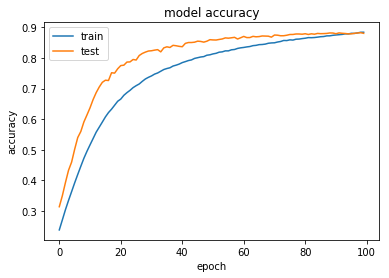

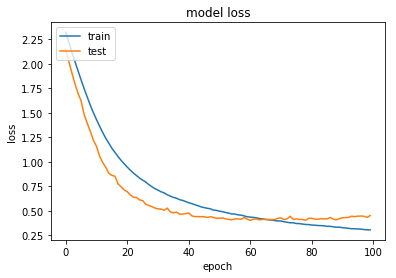

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
# plot accuracy
history_plot(history)

In [38]:
scores = model.evaluate(X_test, y_testtocategorical)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0)) 

36216/36216 [==============================] - 27s 759us/step

	[Info] Accuracy of testing data = 88.0%


In [39]:
print("\t[Info] Making prediction of X_Test")  
prediction = model.predict_classes(X_test)  # Making prediction and save result to prediction  

	[Info] Making prediction of X_Test


In [40]:
# Confusion Matrix 
print("\t[Info] Display Confusion Matrix:")  
print("%s\n" % pd.crosstab(y_test, prediction, rownames=['label'], colnames=['predict']))  

	[Info] Display Confusion Matrix:
predict    0     1     2     3     4     5     6     7     8     9     10  \
label                                                                       
0        1094   719    98    83    62    54    15    26    14    11     2   
1         732  1178   111    44    35    43    18    23     8     4    16   
2         114   118  2016    15    18    15     7     4     2     0     0   
3         150    84    31  1993    19    28     1     5     8     1     0   
4          25    64    17    10  2228     7     1     0     2     1     0   
5          68    52    11     8    11  2175     2     1     3     2     0   
6          13    28    17     0     3     2  2396     2     2     1     0   
7           5    16     0     4     1     0     0  2366     0     1     0   
8           2     9     1     2     2     1     0     1  2355     1     1   
9           3     2     0     0     0     1     0     1     0  2501     0   
10          1     1     2     1     0     